Compare the configurations of various Perceptron models for real world problems


implement a simple Perceptron model using PyTorch, applied to the Digits dataset for a classification task. Here's a breakdown of the different sections:

1. Importing Libraries
The necessary libraries are imported for building and training neural networks (PyTorch), numerical operations (NumPy), dataset handling (Scikit-Learn), and plotting (Matplotlib).

2. Loading the Dataset
The Digits dataset, which consists of images of digits, is loaded. The feature data (X) contains the images represented as arrays, and the target labels (y) contain the digit classes (0-9).

3. Train-Test Split and Standardization
The dataset is split into training and test sets. The features are then standardized to have zero mean and unit variance to aid in the neural network's convergence.

4. Converting Data to PyTorch Tensors
The data, originally in NumPy array format, is converted into PyTorch tensors, which are necessary for training with PyTorch.

5. Defining the Perceptron Model
A simple Perceptron model is defined, consisting of a single linear layer (fully connected layer) that maps the input features directly to the output classes. The model has an input size matching the number of features and an output size matching the number of classes.

6. Initializing the Model, Loss Function, and Optimizer
The Perceptron model is instantiated, using CrossEntropyLoss as the loss function for the multi-class classification task. The Adam optimizer is used to update the model parameters.

7. Training the Model
The model is trained over several epochs. In each epoch, the optimizer's gradients are reset, the model makes predictions on the training data, and the loss is computed. The loss is then backpropagated, and the optimizer updates the model parameters. The training loss for each epoch is recorded.

8. Testing the Model
The model is evaluated on the test data. In evaluation mode, gradient computation is disabled to save memory. The model's predictions on the test set are compared with the true labels to compute the accuracy.

9. Plotting the Training Loss and Displaying Accuracy
Finally, the training loss over the epochs is plotted, and the test accuracy is printed. This visualizes how well the model is learning and provides a measure of its performance on unseen data.

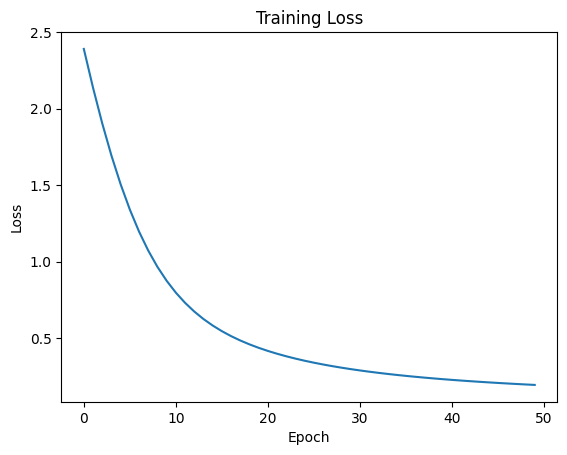

Test Accuracy: 0.9425925925925925


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load a simple dataset (Digits dataset)
digits = load_digits()
X = digits.data
y = digits.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Define the Perceptron model
class SimplePerceptron(nn.Module):
    def __init__(self, input_size, output_size):
        super(SimplePerceptron, self).__init__()
        self.fc = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.fc(x)

# Initialize the model
input_size = X_train.shape[1]
output_size = len(np.unique(y))
model = SimplePerceptron(input_size, output_size)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training the model
num_epochs = 50
train_losses = []

for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

# Testing the model
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    _, predicted = torch.max(test_outputs.data, 1)
    accuracy = accuracy_score(y_test_tensor, predicted)

# Plot the training loss
plt.plot(train_losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

print(f"Test Accuracy: {accuracy}")


PyTorch tensors are a fundamental data structure used in PyTorch, which is a popular deep learning framework. They are similar to NumPy arrays but come with additional capabilities that make them particularly suitable for deep learning and neural network computations.

Key Features of PyTorch Tensors:
Multidimensional Arrays:
PyTorch tensors can represent data in multiple dimensions, just like NumPy arrays. This means they can store scalars (0D), vectors (1D), matrices (2D), and higher-dimensional data (e.g., 3D, 4D tensors).

Efficient Computations:
Tensors are optimized for efficient mathematical operations. PyTorch provides a wide range of operations on tensors, including element-wise operations, reductions (like sum, mean), matrix multiplications, and more.

Automatic Differentiation:
One of the most powerful features of PyTorch tensors is their integration with PyTorch's automatic differentiation library called Autograd. This feature enables automatic calculation of gradients, which is essential for training neural networks using gradient descent. When you set requires_grad=True for a tensor, PyTorch tracks all operations on it, allowing you to compute gradients for optimization.

GPU Acceleration:
PyTorch tensors can be moved to and processed on GPUs, which significantly accelerates computations. This is particularly useful for deep learning tasks, where large amounts of data and complex models can benefit from parallel processing capabilities of GPUs.

Interoperability with NumPy:
PyTorch tensors can be easily converted to and from NumPy arrays. This allows seamless integration with other data processing tools and libraries that use NumPy arrays.

Support for Complex Numbers:
PyTorch also supports complex number tensors, which can be useful in various scientific and engineering applications.


PyTorch Tensors
Data Structure: Tensors are a data structure used to store and manipulate data. They can hold input data, weights, biases, activations, and gradients, among other things.
General Use: Tensors are versatile and can be used for any kind of numerical computation, not just in neural networks. They support a wide range of operations and can be moved between CPUs and GPUs for efficient computation.
Hidden Layers
Neural Network Component: Hidden layers are specific components of a neural network. They are layers that exist between the input layer (which receives the raw data) and the output layer (which produces the final predictions).
Function: Hidden layers contain neurons (or units) that transform the input data into intermediate representations using a series of weighted sums and activation functions. The purpose of these layers is to enable the network to learn complex patterns and features from the data.
Structure: Each hidden layer is characterized by its number of neurons and the activation function applied to its outputs. The weights and biases in these layers are typically learned during the training process using algorithms like backpropagation.
Relationship Between Tensors and Hidden Layers
Tensors in Hidden Layers: The parameters (weights and biases) of a neural network's hidden layers are typically represented as tensors. For example, a weight matrix connecting two layers in a fully connected neural network would be a tensor.
Activation Tensors: The outputs of each hidden layer (the activations) are also represented as tensors. These tensors hold the data that flows through the network during both the forward and backward passes.